In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [95]:
df=pd.read_csv("C:/Users/Janane Sundar/Desktop/admi.csv")
df.head()

,Year,10th Marks,12th Marks,12th Division,Coed,College
0,2019,90,89,3,no,IIT Bombay
1,2015,95,92,2,yes,IIT delhi
2,2018,91,80,6,yes,IIT kanpur
3,2017,88,85,2,no,IIT kharagpur
4,2016,89,84,1,yes,IIT guwahati


In [96]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Coed '] = le.fit_transform(df['Coed '])

In [97]:
colg=np.unique(df['College'])
print(colg)
print(len(df))
print(len(colg))

['Ahemedabad IT' 'BIT Mesra' 'BITS pilani' 'BMS college of ENGG'
 'DTU delhi' 'HBUT kanpur' 'IIEST shibpur' 'IIIT hydrabad' 'IIT Bombay'
 'IIT bhilai' 'IIT delhi' 'IIT goa' 'IIT guwahati' 'IIT hydrabad'
 'IIT indore' 'IIT jammu' 'IIT jodhpur' 'IIT kanpur' 'IIT kharagpur'
 'IIT mandi' 'IIT palakkad' 'IIT ropar' 'IIT tirupati'
 'Jadavpur Univversity' 'KLEF hydrabad' 'MNIT jaipur' 'MNNIT allahabad'
 'MSIT' 'Manipal IT' 'NIT trichy' 'NIT warangal' 'NMIMS'
 'Netaji Subhas IT' 'S O A  university' 'SRMIST chennai'
 'SSN college of ENGG' 'University college of ENGG' 'VIT vellore']
1004
38


In [98]:
code=[]
for i in range(len(colg)):
    code.append(i+1)

In [99]:
df['College']=df['College'].replace(colg,code)
bak_college=np.array(df['College'])
df.head()

,Year,10th Marks,12th Marks,12th Division,Coed,College
0,2019,90,89,3,0,9
1,2015,95,92,2,1,11
2,2018,91,80,6,1,18
3,2017,88,85,2,0,19
4,2016,89,84,1,1,13


In [100]:
X = df.drop(columns=["Year","College"])
y=df['College']

In [107]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

# Now, y_encoded should contain the sequential integer labels starting from 0


In [108]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.05, random_state=5)

# Create and train the XGBoost classifier
clfxg = XGBClassifier(objective="multi:softmax", n_estimators=50, learning_rate=0.0001)
clfxg.fit(X_train, y_train)

# Make predictions and calculate the score
predxg = clfxg.predict(X_test)
scrxg = clfxg.score(X_test, y_test)
scrxg = eval("%0.2f" % scrxg) * 100
print("Algorithm Score: ", scrxg, "%")


Algorithm Score:  65.0 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='10th Marks', ylabel='Density'>

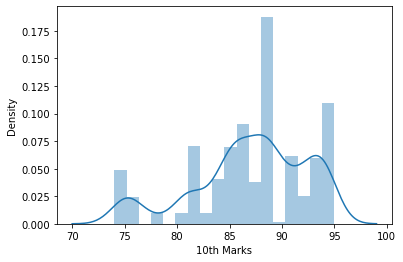

In [109]:
sns.distplot(df['10th Marks'])

In [110]:
pd.crosstab(y_test, predxg, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,3,4,5,6,7,9,10,11,...,25,26,27,28,31,33,34,36,37,All
True,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)
clfdt = DecisionTreeClassifier()
clfdt.fit(X_train,y_train)
preddt=clfdt.predict(X_test)
scrdt=clfdt.score(X_test,y_test)
scrdt=eval("%0.2f"%scrdt)*100
print("Algorithm Score: ",scrdt,"%")

Algorithm Score:  90.0 %


In [114]:
x= clfdt.predict(X_test)

accuracy_score(y_test, x)


0.9019607843137255

### User input section

In [115]:
df.head(2)

,Year,10th Marks,12th Marks,12th Division,Coed,College
0,2019,90,89,3,0,9
1,2015,95,92,2,1,11


In [116]:
col=df.columns.tolist()[1:-1]
print(col)

['10th Marks', '12th Marks', '12th Division', 'Coed ']


In [117]:
usrip=[]
for i in col:
    print("==================================================")
    usrip.append(eval(input(i+": ")))

10th Marks: 67
12th Marks: 78
12th Division: 3
Coed : 1


In [118]:
userpreddt=clfdt.predict([usrip])
print("You may have change to get entrance in: ",colg[code.index(userpreddt[0])])

You may have change to get entrance in:  IIT jammu


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [90]:
dct={col[i]:usrip[i]
    for i in range(len(col))}
print(dct)

{'10th Marks': 78, '12th Marks': 88, '12th Division': 5, 'Coed ': 8}


In [91]:
uip=pd.DataFrame(dct,index=[len(X_test)])
uip.head()

,10th Marks,12th Marks,12th Division,Coed
51,78,88,5,8


In [92]:
userpredxg=clfxg.predict(uip)
print("You may have change to get entrance in: ",colg[code.index(userpredxg[0])])

You may have change to get entrance in:  NMIMS


### New Column SEction

In [93]:
df1.head(2)

,Year,10th Marks,12th Marks,12th Division,Coed,College,College Code
0,2019,90,89,3,no,IIT Bombay,9
1,2015,95,92,2,yes,IIT delhi,11


In [94]:
df1['College Code']=bak_college
df1.head(2)

,Year,10th Marks,12th Marks,12th Division,Coed,College,College Code
0,2019,90,89,3,no,IIT Bombay,9
1,2015,95,92,2,yes,IIT delhi,11
